In [35]:
# example of gathering, reading, and plotting data
# developed by FBB for PUI in 2018
# uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/

In [36]:
from __future__ import print_function #for compatibility beteen python2 and python3

# all other needed modules will be imported as they are needed. 
# I will leave them in the cell where they become relevant BUT  
# PEP8 standards require to move them at the top cell, 
# so you must move your imports in this cell for the homework

# Find data on the portal

 using DHS data on shelter population
 obtained with the following steps from the website 
 
 https://opendata.cityofnewyork.us/ -> Data 
 
 https://opendata.cityofnewyork.us/data/ -> Department of Homeless Services (DHS) (in data by agency)
 
 https://data.cityofnewyork.us/browse?Dataset-Information_Agency=Department+of+Homeless+Services+%28DHS%29
 -> DHS daily report
 
 https://data.cityofnewyork.us/Social-Services/DHS-Daily-Report/k46n-sa2m -> View Data 
 
 https://data.cityofnewyork.us/Social-Services/DHS-Daily-Report/k46n-sa2m/data -> Export
 
 this gives me various links. I copy and paste below the CSV link

# solution 1: download from the portal 


In [54]:
!curl https://data.cityofnewyork.us/resource/utt9-dvgj.csv > gt.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  201k    0  201k    0     0   540k      0 --:--:-- --:--:-- --:--:--  541k


In [55]:
# ove the downloaded data to PUI data
import os
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/jl9760/PUIdata


In [56]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/jl9760/PUIdata


In [57]:
# move the data
!mv gt.csv $PUIDATA

In [58]:
#test if the data is there
!ls $PUIDATA

gt.csv	jl9760.csv  pp.csv  saes.csv  service_request.csv


## read in the data with pandas

In [59]:
#read in the data with pandas
import pandas as pd
gt = pd.read_csv("%s/gt.csv"%os.getenv("PUIDATA"))

In [60]:
#print the fist 8 lines out
gt.head(8)

,dropoff_latitude,dropoff_longitude,ehail_fee,extra,fare_amount,improvement_surcharge,lpep_dropoff_datetime,lpep_pickup_datetime,mta_tax,passenger_count,...,pickup_latitude,pickup_longitude,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,trip_distance,trip_type,vendorid
0,40.645348,-73.776329,NaN,0.0,19.0,0.3,2015-02-10T08:59:50.000,2015-02-10T08:46:15.000,0.5,1,...,40.693958,-73.828262,1,N,4.75,0.0,24.55,5.95,1,2
1,40.679829,-73.998367,NaN,0.0,7.5,0.3,2015-01-09T15:54:32.000,2015-01-09T15:45:22.000,0.5,3,...,40.669933,-73.985672,1,N,1.50,0.0,9.80,1.15,1,2
2,40.736202,-73.909294,NaN,0.5,7.5,0.3,2015-01-16T22:14:25.000,2015-01-16T22:07:38.000,0.5,1,...,40.746658,-73.892570,1,N,0.00,0.0,8.80,1.74,1,2
3,40.710945,-73.957848,NaN,0.5,5.0,0.3,2015-02-11T20:16:39.000,2015-02-11T20:12:29.000,0.5,1,...,40.714123,-73.952034,1,N,0.00,0.0,6.30,0.50,1,2
4,40.755722,-73.912811,NaN,0.0,11.0,0.3,2015-02-26T10:57:30.000,2015-02-26T10:42:27.000,0.5,2,...,40.750774,-73.894104,1,N,0.00,0.0,11.80,1.80,1,2
5,40.749153,-73.915642,NaN,1.0,8.5,0.3,2015-02-02T18:58:08.000,2015-02-02T18:46:40.000,0.5,1,...,40.761700,-73.925423,1,N,0.00,0.0,10.30,1.30,1,1
6,40.651379,-73.918312,NaN,0.5,17.0,0.3,2015-02-17T05:34:04.000,2015-02-17T05:04:16.000,0.5,1,...,40.692600,-73.927223,1,N,0.00,0.0,18.30,3.47,1,2
7,40.806557,-73.960869,NaN,0.0,6.5,0.3,2015-01-05T13:04:51.000,2015-01-05T12:58:10.000,0.5,1,...,40.807327,-73.944420,1,N,0.00,0.0,7.30,1.29,1,2


In [61]:
#print the last 3 lines out
gt.tail(3)

,dropoff_latitude,dropoff_longitude,ehail_fee,extra,fare_amount,improvement_surcharge,lpep_dropoff_datetime,lpep_pickup_datetime,mta_tax,passenger_count,...,pickup_latitude,pickup_longitude,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,trip_distance,trip_type,vendorid
997,40.695221,-73.924805,NaN,0.5,19.5,0.3,2015-02-24T23:57:28.000,2015-02-24T23:31:21.000,0.5,1,...,40.716774,-73.963318,1,N,6.24,0.0,27.04,4.73,1,2
998,40.810173,-73.952950,NaN,0.0,5.0,0.3,2015-02-14T18:55:26.000,2015-02-14T18:51:39.000,0.5,1,...,40.812725,-73.945656,1,N,0.00,0.0,5.80,0.65,1,2
999,40.768059,-73.876465,NaN,1.0,13.0,0.3,2015-02-24T18:48:21.000,2015-02-24T18:33:06.000,0.5,2,...,40.770275,-73.918098,1,N,0.00,0.0,14.80,3.12,1,2


In [62]:
#look at the columns available, those are the variables
gt.columns

Index(['dropoff_latitude', 'dropoff_longitude', 'ehail_fee', 'extra',
       'fare_amount', 'improvement_surcharge', 'lpep_dropoff_datetime',
       'lpep_pickup_datetime', 'mta_tax', 'passenger_count', 'payment_type',
       'pickup_latitude', 'pickup_longitude', 'ratecodeid',
       'store_and_fwd_flag', 'tip_amount', 'tolls_amount', 'total_amount',
       'trip_distance', 'trip_type', 'vendorid'],
      dtype='object')

In [63]:
#count how many rows, those are the data points
gt.size

21000

In [65]:
#select 2 columns only for plotting
gt_2c = gt[['fare_amount', 'tip_amount']]

In [66]:
gt_2c.head()

,fare_amount,tip_amount
0,19.0,4.75
1,7.5,1.50
2,7.5,0.00
3,5.0,0.00
4,11.0,0.00


## plot the data

In [67]:
gt_2c.plot(x="fare_amount", y="tip_amount")

In [68]:
# wont show anything if i do not use the magic command to show plots in the notebook 
#(or use pl.show to pop up a window, but for the homework plots have to be embedded)

In [69]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


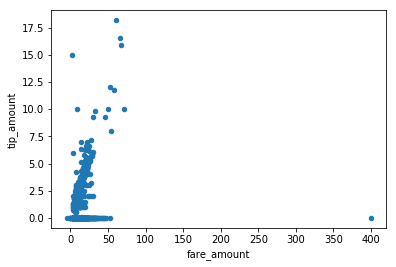

In [70]:
gt_2c.plot(x="fare_amount", y="tip_amount", kind='scatter');
# every plot needs a caption that explains to the reader 
# 1) WHAT what the reader is loooking at and 
# 2) WHY why the reader is looking at it here in the analysis 
#      (in this case there is no why cause this plot is not part of an analysis)
# 3) TAKE HOME what is the take home point for the plot in the analysis 
#      (also there is no take home point here cause we are not doind an analysis but you can point out interesting features)

Figure 1: The amount of tips against the amount of total fare. The two variable curiously do not display a strong correlation. Also the most of the fare amount are under 100. The most of the tip amount are under 7.5.

# solution 2: Use API and download a json file

from the dataset export link now go to -> SODA API and the the endpoint

In [71]:
url = "https://data.cityofnewyork.us/resource/utt9-dvgj.json"

In [72]:
#use the appropriatepandas function to read in the json file
df = pd.read_json(url)

In [73]:
# print it out
df.head(3)

,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,lpep_dropoff_datetime,lpep_pickup_datetime,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,trip_distance,trip_type,vendorid
0,40.645348,-73.776329,0.0,19.0,0.3,2015-02-10T08:59:50.000,2015-02-10T08:46:15.000,0.5,1,1,40.693958,-73.828262,1,N,4.75,0.0,24.55,5.95,1,2
1,40.679829,-73.998367,0.0,7.5,0.3,2015-01-09T15:54:32.000,2015-01-09T15:45:22.000,0.5,3,1,40.669933,-73.985672,1,N,1.50,0.0,9.80,1.15,1,2
2,40.736202,-73.909294,0.5,7.5,0.3,2015-01-16T22:14:25.000,2015-01-16T22:07:38.000,0.5,1,2,40.746658,-73.892570,1,N,0.00,0.0,8.80,1.74,1,2


In [74]:
#now select a date and 2 variables
gt_3c = df[['lpep_dropoff_datetime', 'fare_amount', 'tip_amount']]

for consistency with the data above, I will change the names of the columns (variables) to be the same as before. This way the plots will come out with the same labels and legends

In [75]:
gt_3c.rename(columns = {'lpep_dropoff_datetime':'Lpep Dropoff Datetime', 
               'fare_amount':'Fare Amount', 
               'tip_amount': 'Tip Amount'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


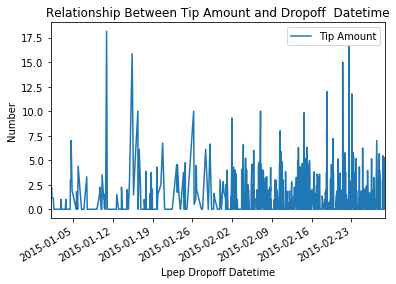

In [86]:
#as a default this plot wont have a y label, but all plots must have axis labels!
ax = gt_3c.plot(x='Lpep Dropoff Datetime', y='Tip Amount', title='Relationship Between Tip Amount and Dropoff  Datetime');
ax.set_ylabel("Number");

i do not like the formatting of those dates so I will drom the timestamp overwriting the original column. 
for more info on baisc timestamp manipulation 
( no capation cause I am remaking this figure)


In [77]:
gt_3c["Lpep Dropoff Datetime"] = gt_3c["Lpep Dropoff Datetime"].apply(lambda x: pd.Timestamp(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


now that I am using timestamps (instead of strings as the data got read in form the json file) Pandas know to rotate the labels appropriately so I can drop rot=90

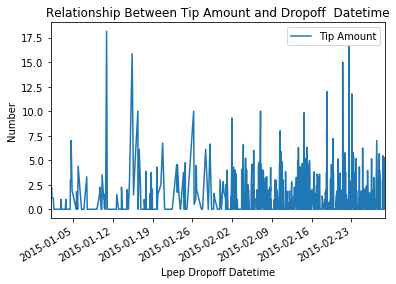

In [83]:
ax = gt_3c.plot(x='Lpep Dropoff Datetime', y='Tip Amount', title='Relationship Between Tip Amount and Dropoff  Datetime')
ax.set_ylabel("Number");

Figure 2: The amount of tips as a function of time between 01/05/2015 and 02/23/2018. There is no single trend.

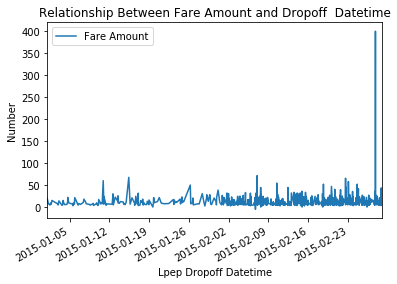

In [85]:
#plot the other columns
ax_1 = gt_3c.plot(x='Lpep Dropoff Datetime', y='Fare Amount', title='Relationship Between Fare Amount and Dropoff  Datetime')
ax_1.set_ylabel("Number");

Figure 3: The amount of tips as a function of time between 01/05/2015 and 02/23/2018.Just like Figure 2, there is no single trend as well.